### Steps:
<ul>
    <li>Quality control
    <li>Trim flank sequences
    <li>Count unique insertion sequences
    <li>Collapse on 1/2-Hamming distances
    <li>Translate DNA --> amino acids
    <li>Compute:<ul>
                    <li>Frequency
                    <li>Average frequency
                    <li>Enrichment Score
                    <li>Heatmap
</ul>

2 tool suggestions:
- UMItools (CLI tool) - clustering algorithm
- cutadapt 

In the large fastq library file, I'm only pulling the sequences that I've already found in the tissue files


## Quality control (skipped for now)

## Trim Flank Sequences
Trimming of invariable sequence flanking the insertion sequence allowing a 10% error rate (currently allowing 0% error rate--we'll work on this later)

In [1]:
import gzip
from mimetypes import guess_type
from functools import partial
from Bio import SeqIO

In [2]:
input_file = '/Users/jonathanlifferth/data/bioinformatics/Divergene/question2/liver cDNA/1153-cDNA-8V8_S30_L001_R1_001.fastq.gz'

encoding = guess_type(input_file)[1]  # uses file extension
_open = partial(gzip.open, mode='rt') if encoding == 'gzip' else open

read_count = 0
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
        read_count += 1

print(read_count)

173019


In [3]:
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
        print(record)
        print(record.seq)
        break

ID: M06176:70:000000000-JW4VC:1:1101:8803:1076
Name: M06176:70:000000000-JW4VC:1:1101:8803:1076
Description: M06176:70:000000000-JW4VC:1:1101:8803:1076 1:N:0:NCGGTCCAAC+NCTTACATCA
Number of features: 0
Per letter annotation for: phred_quality
Seq('TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCA...CGG')
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCAAGGCAAATCTGNTNGTNNTACTCTGNNNNNCNCGGCTCCTNAAANTGGAACTGNNAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG


In [4]:
Left_flank = 'taacttgcagcagcaaGGC' 
Right_flank = 'GCCaacacggctcctcaaa'

Left_flank = Left_flank.upper()
Right_flank = Right_flank.upper()
print(Left_flank, Right_flank)

TAACTTGCAGCAGCAAGGC GCCAACACGGCTCCTCAAA


In [5]:
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
        print(record.seq)
        if Left_flank in record.seq:
            index = record.seq.find(Left_flank)
            print('Left_flank in record.seq at index : ', str(index))
            left_flank_loc = record.seq[:index] + ' left flank start --> ' + record.seq[index:index + len(Left_flank)] + ' <-- left flank end ' + record.seq[index + len(Left_flank):]
            print(left_flank_loc)
        if Right_flank in record.seq:
            index = record.seq.find(Right_flank)
            print('Right_flank in record.seq at index : ', str(index))
            Right_flank_loc = record.seq[:index] + ' right flank start --> ' + record.seq[index:index + len(Right_flank)] + ' <-- right flank end ' + record.seq[index + len(Right_flank):]
            print(Right_flank_loc)
            break

TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCAAGGCAAATCTGNTNGTNNTACTCTGNNNNNCNCGGCTCCTNAAANTGGAACTGNNAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG
Left_flank in record.seq at index :  39
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGA left flank start --> TAACTTGCAGCAGCAAGGC <-- left flank end AAATCTGNTNGTNNTACTCTGNNNNNCNCGGCTCCTNAAANTGGAACTGNNAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCGTGCCAACACGGNTNCTNNAATTGGANNNNNCNACAGCCAGNGGGNCTTACCCGNNATGGTCTGGCAGAACCGGGACGTGTACCT
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCAAGGCTCTGAAANGCCGANTGGTTTCNNNAACACGGCTCCTNAAATTGGAACTGNNAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG
Left_flank in record.seq at index :  39
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGA left flank start --> TAACTTGCAGCAGCAAGGC <-- left flank end TCTGAAANGCCGANTGGTTTCNNNAACACGGCTCCTNAAATTGGAACTGNNAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCAAGGCCAGGGTCNTGTTCNGCAGCAGGNCAACACGG

In [6]:
# goal: display left and right flank tags together 
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
#         print(record.seq)
        if Left_flank in record.seq and Right_flank in record.seq:
            l_start = record.seq.find(Left_flank)
            r_start = record.seq.find(Right_flank)
            print('Left_flank in record.seq at index : ', str(l_start))
            print('Right_flank in record.seq at index : ', str(r_start))
            annotated_seq = record.seq[:l_start] + ' left flank start --> ' + record.seq[l_start:l_start + len(Left_flank)] + ' <-- left flank end ' + record.seq[l_start + len(Left_flank):r_start]
            annotated_seq += ' right flank start --> ' + record.seq[r_start:r_start + len(Right_flank)] + ' <-- right flank end ' + record.seq[r_start + len(Right_flank):]
            print(annotated_seq)
            break


Left_flank in record.seq at index :  39
Right_flank in record.seq at index :  79
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGA left flank start --> TAACTTGCAGCAGCAAGGC <-- left flank end CTGTACCNGCATCATACTGAC right flank start --> GCCAACACGGCTCCTCAAA <-- right flank end TTGGAACTTNCAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG


In [7]:
# goal: extract all insert sequences
insert_seqs = []
index = 0
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
        if Left_flank in record.seq and Right_flank in record.seq:
            seq_start = record.seq.find(Left_flank) + len(Left_flank)
            seq_end = record.seq.find(Right_flank)
#             print('start: ', seq_start, ', end: ', seq_end)
            seq = record.seq[seq_start:seq_end]
            insert_seqs.append(seq)
            index += 1
print(index)
print(len(insert_seqs))


115746
115746


In [8]:
print(len(insert_seqs))

115746


In [9]:
seq_lengths = [len(seq) for seq in insert_seqs]
seq_lengths

[21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 24,
 21,
 21,
 21,
 21,
 30,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 24,
 21,
 24,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 30,
 21,
 24,
 21,
 24,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,


In [10]:
seq_length_dict = {}
for seq in insert_seqs:
    if len(seq) not in seq_length_dict:
        seq_length_dict[len(seq)] = 1
    else:
        seq_length_dict[len(seq)] += 1

seq_length_dict

{21: 104313, 24: 10511, 30: 769, 27: 17, 18: 102, 20: 23, 19: 2, 22: 5, 23: 4}

In [11]:
seq_length_length = []
seq_length_count = []
for item in seq_length_dict:
    seq_length_length.append(item)
    seq_length_count.append(seq_length_dict[item])
seq_length_length
seq_length_count

[104313, 10511, 769, 17, 102, 23, 2, 5, 4]

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
seq_length_df = pd.DataFrame.from_dict(list(zip(seq_length_length,seq_length_count)))
seq_length_df.columns=['length','count']
seq_length_df = seq_length_df.sort_values(by=['count'], ascending=False)
seq_length_df

,length,count
0,21,104313
1,24,10511
2,30,769
4,18,102
5,20,23
3,27,17
7,22,5
8,23,4
6,19,2


In [14]:
# sns.displot(seq_length_df)

<AxesSubplot:xlabel='length', ylabel='count'>

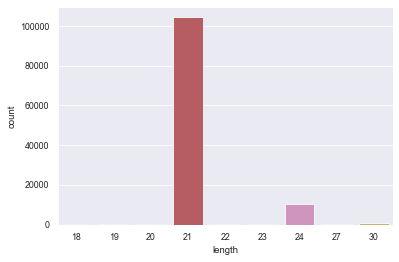

In [15]:
sns.set_theme('paper')
sns.barplot(data=seq_length_df, x='length', y='count')

In [16]:
print(len(insert_seqs))

115746


In [17]:
insert_seqs[0]

Seq('CTGTACCNGCATCATACTGAC')

In [18]:
import numpy as np

In [19]:
insert_seqs_array = np.asarray(insert_seqs, dtype=object)
unique_seqs = np.unique(insert_seqs_array)
len(unique_seqs)

2759

In [20]:
unique_seqs_dict = {}
for seq in unique_seqs:
    unique_seqs_dict[str(seq)] = insert_seqs.count(seq)
    
print(unique_seqs_dict)

{'AAAAAAAATCATGCGGGACGAA': 1, 'AAAAAAAGCATGCATGACGAA': 1, 'AAAAAAATCAAGCGTGACGAA': 1, 'AAAAAAATCATACGTGACGAA': 1, 'AAAAAAATCATCCGTGACGAA': 1, 'AAAAAAATCATGCGGGACGAA': 1, 'AAAAAAATCATGCGTGAAGAA': 1, 'AAAAAAATCATGCGTGACGAA': 522, 'AAAAAAATCATGCGTGACTAA': 1, 'AAAAAAATCATGCGTGATGAA': 1, 'AAAAAAATCATGTGTGACGAA': 1, 'AAAAAAATCATTCGGGACGAA': 1, 'AAAAAAATCCTGCGTGACGAA': 1, 'AAAAAAATTGTTCTTGACGTT': 1, 'AAAAAACTCATGCGTGACGAA': 1, 'AAAAAATCATGCGTGACGAA': 3, 'AAAAAATCTTCTGACAACTAC': 1, 'AAAAACAAAGGTTTCGTTGGTGAC': 1, 'AAAAACGTTGTGTCTGCGGGT': 1, 'AAAAAGATCATGCGTGACGAA': 1, 'AAAAATGTTGTTACTGGTGTT': 1, 'AAAACAATCATGCGTGACGAA': 1, 'AAAACAATCATGCGTGACGCA': 1, 'AAAACCCAGGTTTCTAAACCG': 1, 'AAAACGGTTGTTACTTGTGAT': 1, 'AAAACTGACGTCACTGATGTT': 1, 'AAAACTGATGTAACTGGTGTT': 1, 'AAAACTGATGTTACTGGTGTT': 1, 'AAAACTGCTATTGGTAACGAC': 1, 'AAAACTGCTGTTACTGGTGTT': 1, 'AAAACTGGTGTTACTGGTGTT': 1, 'AAAACTGTGGACACTGGGGTT': 1, 'AAAACTGTTGCTACTGGTGTT': 1, 'AAAACTGTTGTTACCGGTGTT': 1, 'AAAACTGTTGTTACTGGAGTT': 1, 'AAAACTGTTGTTA

In [21]:
unique_seqs_sorted = sorted(unique_seqs_dict.items(), key=lambda x: x[1], reverse=True)
unique_seqs_sorted

[('GACGTTAAACCGTACTCTATG', 7006),
 ('TACCATCATGACCATCCGATC', 6281),
 ('GACTCTGTTCGTGCTCAGAAA', 6016),
 ('ATCTTCCGTGACTCTCGTGTT', 5677),
 ('AAAGTTCGTGCTCCGAACATC', 5498),
 ('ACTAAATCTCAGATGACTGTT', 5005),
 ('CCGGGTAAAATGCAGGGTAAA', 4944),
 ('GGTGGTAACGACGCTTACATC', 4334),
 ('ATGCAGAAAGACCAGCTGAAAAAA', 3680),
 ('ATGGGTCGTCCGGCTCAGCAT', 3380),
 ('CTGTACCTGCATCATACTGAC', 2827),
 ('GTTGTTGCTGACGGTGGTCGT', 2813),
 ('CGTGGTCCGAAAGAAATCGCT', 2774),
 ('CAGGGTCATGTTCAGCAGCAG', 2755),
 ('GTTCGTGTTCAGGGTCAGCATATC', 2366),
 ('AAATTCGTTGTTAAAGCTCAG', 2339),
 ('CGTCGTGAACAGATGCTGGGT', 2117),
 ('TCTGAAATGCCGACTGGTTTC', 2011),
 ('AAAGCTCAGGTTTCTAAACCG', 1953),
 ('AAAATCAAAGGTTTCGTTGGTGAC', 1878),
 ('AAAGCTGCTATCGGTAACGAC', 1626),
 ('TCTGCTAAAAAAGTTGACACT', 1555),
 ('CCGCAGTACGCTCAGATCTCT', 1503),
 ('ATGTCTCAGAAAACTTACGTT', 1477),
 ('ATGGAAGCTGACGGTACTTTC', 1381),
 ('CATCATACTTCTACTACTCTG', 1362),
 ('GTTGACGGTAAACAGCGTTAC', 1315),
 ('ACTACTACTCCGGCTCGTGGT', 1305),
 ('TACCATTCTATGACTATGGAC', 1205),
 ('AA

In [22]:
!pip3 install umi_tools

## Practice UMIClusterer class "functor"

In [23]:
from umi_tools import UMIClusterer
clusterer = UMIClusterer(cluster_method="directional")

In [24]:
print()

In [25]:
for seq in unique_seqs_sorted[0:4]:
    print(seq[0])
    print(seq[1])

GACGTTAAACCGTACTCTATG
7006
TACCATCATGACCATCCGATC
6281
GACTCTGTTCGTGCTCAGAAA
6016
ATCTTCCGTGACTCTCGTGTT
5677


In [26]:
umis = {b"GACGTTAAACCGTACTCTATG": 7006,
        b"GACGTTAAACCGTACTCTATA": 3000,
        b"GACTCTGTTCGTGCTCAGAAA": 3000,
        b"ATCTTCCGTAAAACTCGTGGG": 3000,
        b"GGGGGGCGTAAAACTCGTGGG": 1000
}
print(umis, '\n')

clustered_umis = clusterer(umis, threshold=2)
print(clustered_umis)

{b'GACGTTAAACCGTACTCTATG': 7006, b'GACGTTAAACCGTACTCTATA': 3000, b'GACTCTGTTCGTGCTCAGAAA': 3000, b'ATCTTCCGTAAAACTCGTGGG': 3000, b'GGGGGGCGTAAAACTCGTGGG': 1000} 

[[b'GACGTTAAACCGTACTCTATG', b'GACGTTAAACCGTACTCTATA'], [b'GACTCTGTTCGTGCTCAGAAA'], [b'ATCTTCCGTAAAACTCGTGGG'], [b'GGGGGGCGTAAAACTCGTGGG']]


In [27]:
clustered_umis = clusterer(umis, threshold=2)
print(clustered_umis)

[[b'GACGTTAAACCGTACTCTATG', b'GACGTTAAACCGTACTCTATA'], [b'GACTCTGTTCGTGCTCAGAAA'], [b'ATCTTCCGTAAAACTCGTGGG'], [b'GGGGGGCGTAAAACTCGTGGG']]


In [28]:
umis2 = {b"ATAT": 10,
        b"GTAT": 5,
        b"CCAT": 3}

In [29]:
clustered_umis2 = clusterer(umis2, threshold=1)
print(clustered_umis2)

[[b'ATAT', b'GTAT'], [b'CCAT']]


In [30]:
umis3 = {b"ATAT": 10,
        b"GTAT": 5,
        b"CCAT": 3}

clustered_umis3 = clusterer(umis3, threshold=1)
print(clustered_umis3)

[[b'ATAT', b'GTAT'], [b'CCAT']]


In [31]:
len('GACGTTAAACCGTACTCTATG')

21

# Cluster 21 nucleotide sequences that differ by 1-Hamming distance

Note: The UMIClusterer class only clusters sequences of equal length and 21 nt is, by far, the most frequent seq length. Therefore, only 21 nt seqs are evaluated here. Other length seqs can easily be evaluated with the same logic.

In [32]:
unique_umis = {}
for seq in unique_seqs_sorted:
    if len(seq[0]) == 21:
        seq_bytes = str.encode(seq[0])
        unique_umis[seq_bytes] = seq[1]
len(unique_umis)

2485

In [33]:
clustered_unique_umis = clusterer(unique_umis, threshold=1)
print(len(clustered_unique_umis))

860


In [34]:
for cluster in clustered_unique_umis:
    print(len(cluster))
    print(cluster)

98
[b'GACGTTAAACCGTACTCTATG', b'GACGTTAAACCGTACTCTATT', b'GACGTTAAACCGTACGCTATG', b'GACGTTACACCGTACTCTATG', b'GACGATAAACCGTACTCTATG', b'GACGTTAAACCGTACTCTATA', b'GACGTTAAACCGTACTATATG', b'GACGTTAAACCATACTCTATG', b'GACGTTAAACAGTACTCTATG', b'GACGTTAAACTGTACTCTATG', b'GATGTTAAACCGTACTCTATG', b'GACGTTAAAACGTACTCTATG', b'GACGTTAAACCGTACTCTGTG', b'GCCGTTAAACCGTACTCTATG', b'GACGTTAAACCGGACTCTATG', b'GACGTTAAACCTTACTCTATG', b'GACGTTAAACCGTACTCTATC', b'GACGTTAAACCGCACTCTATG', b'GACGTGAAACCGTACTCTATG', b'GACGTTAAACCGTACTCTACG', b'GACGTTAAACCGTGCTCTATG', b'GACGTTAAACCGAACTCTATG', b'GACGTTAAACCGTACCCTATG', b'GACGTTAAACCGAACGCTATG', b'GACGATAAACCGCACTCTATG', b'AACGTTAAACCGTACTCTATG', b'GACGTTAAACCGTACACTATG', b'GACGTTAAACCGTACTCGATT', b'GACGGTAAACCGTACTCTATG', b'GACGTTAAACCGTACTCTAGG', b'GACGTTAAACCGTACTCAATG', b'GACGTTAAACCGTCCTCTATG', b'GACGTTCAACCGTACTCTATG', b'GACGTTAGACCGTACTCTATG', b'GACGTTAAACCGTACTCTTTG', b'GTCGTTAAACCGTACTCTATG', b'GACTTTAAACCGTACTCTATG', b'GACGTTAAACCGTACGCTATT', b'GACGTT

1
[b'CTGGACCTTCATCATACTAAC']
1
[b'CTGGCTGGTGCCGAGAACTTC']
1
[b'CTGGGCAAATACCGTGGTAAA']
1
[b'CTGTACCTGCATAATAATGAT']
1
[b'CTGTACCTGCATGATCCTGAC']
1
[b'CTGTAGCTCAATCATACTGAC']
1
[b'CTGTCTCAGAAACCTTACGTT']
1
[b'CTGTGTAAAATGCAGGATAAA']
1
[b'CTGTTCCTGCATCTTACTGAT']
1
[b'CTTAACCTTGATAAAACGTAC']
1
[b'CTTCGTCATCAGGCTATGCAT']
1
[b'GAAAAACTTATCAGTGAGGAC']
1
[b'GAAAACATGGTGCACCGTCAT']
1
[b'GAAAACGACGACGCGTACATC']
1
[b'GAACTTTTACAGTATTCTGTG']
1
[b'GAAGAAGTTATGATACGTGAC']
1
[b'GAAGACGTTATGAAACATTAC']
1
[b'GAAGATACACCGTACTCAATG']
1
[b'GAAGATGTTGTTAAACGTTAC']
1
[b'GAAGCGCAGAATACTAAACCA']
1
[b'GAAGTTTGTACCCCGAACATC']
1
[b'GAATAAGTTATGAATCGATTC']
1
[b'GAATTCGTTGTCAATGCTCAT']
1
[b'GACATTGAACGTTACTCTATC']
1
[b'GACATTGCTAGTGGTGAGAAA']
1
[b'GACCATCCTCGCCTTGAGGTC']
1
[b'GACCCTGATCCTGCTCAGTTC']
1
[b'GACCTGTAAGCGCACACCTCT']
1
[b'GACGAACAACCGTATTCTCGG']
1
[b'GACGATAAACCGAAAGATGGT']
1
[b'GACGATACACCGTACACTATG']
1
[b'GACGATCTTGTTAACAAAGGT']
1
[b'GACGATGGACCTCACTCGATG']
1
[b'GACGCGTAACCTTCTGCTATG']
1
[b'GACGCTAAA

In [35]:
# new counts based on 1-Hamming distance clustering

clustered_seq_counts = {}
for cluster in clustered_unique_umis:
    clustered_seq_counts[cluster[0].decode()] = 0
    for seq in cluster:
        clustered_seq_counts[cluster[0].decode()] += unique_seqs_dict[seq.decode()]
        
clustered_seq_counts

{'GACGTTAAACCGTACTCTATG': 7219,
 'TACCATCATGACCATCCGATC': 6399,
 'GACTCTGTTCGTGCTCAGAAA': 6195,
 'ATCTTCCGTGACTCTCGTGTT': 5846,
 'AAAGTTCGTGCTCCGAACATC': 5635,
 'ACTAAATCTCAGATGACTGTT': 5143,
 'CCGGGTAAAATGCAGGGTAAA': 5106,
 'GGTGGTAACGACGCTTACATC': 4440,
 'ATGGGTCGTCCGGCTCAGCAT': 3473,
 'CTGTACCTGCATCATACTGAC': 2916,
 'GTTGTTGCTGACGGTGGTCGT': 2875,
 'CGTGGTCCGAAAGAAATCGCT': 2858,
 'CAGGGTCATGTTCAGCAGCAG': 2839,
 'AAATTCGTTGTTAAAGCTCAG': 2407,
 'CGTCGTGAACAGATGCTGGGT': 2186,
 'TCTGAAATGCCGACTGGTTTC': 2058,
 'AAAGCTCAGGTTTCTAAACCG': 2021,
 'AAAGCTGCTATCGGTAACGAC': 1663,
 'TCTGCTAAAAAAGTTGACACT': 1589,
 'CCGCAGTACGCTCAGATCTCT': 1546,
 'ATGTCTCAGAAAACTTACGTT': 1523,
 'ATGGAAGCTGACGGTACTTTC': 1414,
 'CATCATACTTCTACTACTCTG': 1434,
 'GTTGACGGTAAACAGCGTTAC': 1348,
 'ACTACTACTCCGGCTCGTGGT': 1342,
 'TACCATTCTATGACTATGGAC': 1450,
 'AACAAAGTTAACGTTGTTAAA': 1086,
 'GAAGAAGTTATGAAACGTTAC': 1015,
 'CAGTCTCAGATGCGTAACACT': 949,
 'TCTCGTCATATGCCGGCTACT': 783,
 'TCTCAGGACCGTCCGCAGAAA': 772,
 'AAAACTGTT

# Cluster 21 nucleotide sequences that differ by 2-Hamming distance

In [36]:
clustered_unique_umis2 = clusterer(unique_umis, threshold=2)
print(len(clustered_unique_umis2))

545


In [37]:
# new counts based on 1-Hamming distance clustering

clustered_seq_counts2 = {}
for cluster in clustered_unique_umis2:
    clustered_seq_counts2[cluster[0].decode()] = 0
    for seq in cluster:
        clustered_seq_counts2[cluster[0].decode()] += unique_seqs_dict[seq.decode()]
        
clustered_seq_counts2

{'GACGTTAAACCGTACTCTATG': 7245,
 'TACCATCATGACCATCCGATC': 6413,
 'GACTCTGTTCGTGCTCAGAAA': 6207,
 'ATCTTCCGTGACTCTCGTGTT': 5862,
 'AAAGTTCGTGCTCCGAACATC': 5648,
 'ACTAAATCTCAGATGACTGTT': 5151,
 'CCGGGTAAAATGCAGGGTAAA': 5121,
 'GGTGGTAACGACGCTTACATC': 4453,
 'ATGGGTCGTCCGGCTCAGCAT': 3486,
 'CTGTACCTGCATCATACTGAC': 2926,
 'GTTGTTGCTGACGGTGGTCGT': 2880,
 'CGTGGTCCGAAAGAAATCGCT': 2869,
 'CAGGGTCATGTTCAGCAGCAG': 2843,
 'AAATTCGTTGTTAAAGCTCAG': 2410,
 'CGTCGTGAACAGATGCTGGGT': 2192,
 'TCTGAAATGCCGACTGGTTTC': 2065,
 'AAAGCTCAGGTTTCTAAACCG': 2026,
 'AAAGCTGCTATCGGTAACGAC': 1668,
 'TCTGCTAAAAAAGTTGACACT': 1596,
 'CCGCAGTACGCTCAGATCTCT': 1552,
 'ATGTCTCAGAAAACTTACGTT': 1527,
 'ATGGAAGCTGACGGTACTTTC': 1420,
 'CATCATACTTCTACTACTCTG': 1436,
 'GTTGACGGTAAACAGCGTTAC': 1349,
 'ACTACTACTCCGGCTCGTGGT': 1345,
 'TACCATTCTATGACTATGGAC': 1463,
 'AACAAAGTTAACGTTGTTAAA': 1089,
 'GAAGAAGTTATGAAACGTTAC': 1019,
 'CAGTCTCAGATGCGTAACACT': 952,
 'TCTCGTCATATGCCGGCTACT': 787,
 'TCTCAGGACCGTCCGCAGAAA': 775,
 'AAAACTGTT

In [38]:
for seq in clustered_unique_umis[55]:
    print(seq.decode("utf-8"))

GTTCCGGACCAGCGTCCGAAA
GTTCCGAACCAGCGTCCGAAA
GTTCCGGACCAGTGTCCGAAA
GTTCCGGACCAGCGTCCGAAT
ATTCCGGACCAGCGTCCGAAA


# Visualize a UMI cluster graph

### Exanple: Below is the 55th cluster from the 21 nucleotide insert sequences
### The central node had the highest frequency prior to clustering -- each child node is a sequence with a hamming distance of 1 from the central node.
![](cluster55.png)

# Translate DNA to amino acid sequences for 2000 most abundant peptides

In [39]:
to_translate = unique_seqs_sorted[:2000]

In [40]:
from Bio.Seq import Seq

In [41]:
peptides = []
for seq in to_translate:
    dna = Seq(seq[0])
    rna = dna.transcribe()
    peptide = rna.translate()
    peptides.append(str(peptide))
#     print(dna)
#     print(rna)
#     print(peptide)
    

/Users/jonathanlifferth/opt/anaconda3/lib/python3.8/site-packages/Bio/Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [42]:
peptides

['DVKPYSM',
 'YHHDHPI',
 'DSVRAQK',
 'IFRDSRV',
 'KVRAPNI',
 'TKSQMTV',
 'PGKMQGK',
 'GGNDAYI',
 'MQKDQLKK',
 'MGRPAQH',
 'LYLHHTD',
 'VVADGGR',
 'RGPKEIA',
 'QGHVQQQ',
 'VRVQGQHI',
 'KFVVKAQ',
 'RREQMLG',
 'SEMPTGF',
 'KAQVSKP',
 'KIKGFVGD',
 'KAAIGND',
 'SAKKVDT',
 'PQYAQIS',
 'MSQKTYV',
 'MEADGTF',
 'HHTSTTL',
 'VDGKQRY',
 'TTTPARG',
 'YHSMTMD',
 'NKVNVVK',
 'EEVMKRY',
 'QSQMRNT',
 'SRHMPAT',
 'SQDRPQK',
 'KTVVTGV',
 'ASGAGKQS',
 'SFQFKER',
 'KQPHSQS',
 'IKPLEIK',
 'VVSRGAV',
 'VEPQGPR',
 'VIKPTGK',
 'KDYPRGD',
 'FYFYFQA',
 'YVGVLRG',
 'KKIMRDE',
 'SKASQQT',
 'RLMPNPK',
 'KSAGVTL',
 'HNKVQAM',
 'IGMSQPA',
 'SKGVIHQDKD',
 'KVSPERKL',
 'PDSGVRV',
 'HHEHHVL',
 'SFRHDSG',
 'AVKGLTQGMT',
 'QQKQIDK',
 'KVVPNGQK',
 'AYREGRH',
 'VDTKNKL',
 'VSGIKFN',
 'PNFIQVR',
 'VPDQRPK',
 'YHSMTMG',
 'GMMSFEH',
 'ANIKNPIR',
 'QIDKSRS',
 'EIRATTKI',
 'MGTVKQE',
 'MTQRGQA',
 'LRQLVMH',
 'ENMVQRH',
 'RVGSIKQ',
 'MYQREKS',
 'RVGSSDV',
 'YNSPVVP',
 'YALGSDDS',
 'QVGHQNI',
 'HDHVSRG',
 'GKKEIAS',
 'SSTIAQ',
 '

## Compute:
<ul>
<li>i. Frequency in samples
<li>ii. Average frequency across samples
<li>iii. Enrichment score, dividing frequency in tissue sample by frequency
in input library
<li>iv. Report your results on a heatmap (bonus)
<ul>

## Frequency in samples
### (Liver cDNA only)

In [43]:
import os
import time
from datetime import datetime

now = datetime.now()

In [44]:
target_dir = '/Users/jonathanlifferth/data/bioinformatics/Divergene/question2/liver cDNA'

paths = []
for root, dirs, files in os.walk(target_dir):
    for file in files:
        if file.endswith('fastq.gz'):
            paths.append(os.path.join(root,file))            
paths.sort()
paths

for path in paths:
    key = path.split('/')[-1][:4]
    print(key)

1017
1027
1032
1153
1163
1168


In [45]:
for input_file in paths:
    encoding = guess_type(input_file)[1]  # uses file extension
    _open = partial(gzip.open, mode='rt') if encoding == 'gzip' else open

    read_count = 0
    with _open(input_file) as f:
        for record in SeqIO.parse(f, 'fastq'):
            read_count += 1
    print(now)
    print(read_count)

2022-02-28 21:09:52.725963
425565
2022-02-28 21:09:52.725963
428145
2022-02-28 21:09:52.725963
484017
2022-02-28 21:09:52.725963
173019
2022-02-28 21:09:52.725963
174413
2022-02-28 21:09:52.725963
187484


In [46]:
start = datetime.now()
for i in range(10000):
    a = 2 + 2
end = datetime.now()
print(end - start)

0:00:00.000955


In [47]:
# extract all insert sequences
# start = datetime.now()



In [48]:
all_seqs = {}
seq_dict_of_dicts = {}

def get_seqs(path):
    
    start = datetime.now()
    insert_seqs = []
    index = 0
    unique_seqs_dict = {}

    with _open(path) as f:
        for record in SeqIO.parse(f, 'fastq'):
            index += 1
            if Left_flank in record.seq and Right_flank in record.seq:
                seq_start = record.seq.find(Left_flank) + len(Left_flank)
                seq_end = record.seq.find(Right_flank)
    #             print('start: ', seq_start, ', end: ', seq_end)
                seq = record.seq[seq_start:seq_end]
                insert_seqs.append(seq)

        # record unique sequence counts
        insert_seqs_array = np.asarray(insert_seqs, dtype=object)
        unique_seqs = np.unique(insert_seqs_array)

        
        for seq in unique_seqs:
            unique_seqs_dict[str(seq)] = insert_seqs.count(seq)
            if seq not in all_seqs:
                all_seqs[str(seq)] = insert_seqs.count(seq)
            else:
                all_seqs[str(seq)] += insert_seqs.count(seq)

        key = path.split('/')[-1][:4]
        seq_dict_of_dicts[str(key)] = unique_seqs_dict



        print('All seqs: ', index)
        print('Insert seqs:', len(insert_seqs))
        print('Unique seqs: ', len(unique_seqs_dict))
        print(datetime.now() - start)


In [49]:
paths[0]

'/Users/jonathanlifferth/data/bioinformatics/Divergene/question2/liver cDNA/1017-cDNA-8V8_S29_L001_R1_001.fastq.gz'

In [50]:
insert_seqs = []
index = 0
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
        if Left_flank in record.seq and Right_flank in record.seq:
            seq_start = record.seq.find(Left_flank) + len(Left_flank)
            seq_end = record.seq.find(Right_flank)
#             print('start: ', seq_start, ', end: ', seq_end)
            seq = record.seq[seq_start:seq_end]
            insert_seqs.append(seq)
            index += 1
print(index)
print(len(insert_seqs))

111294
111294


In [56]:
insert_seqs = []
index = 0
unique_seqs_dict = {}

with _open(paths[1]) as f:
    for record in SeqIO.parse(f, 'fastq'):
        index += 1     
        if Left_flank in record.seq and Right_flank in record.seq:
            seq_start = record.seq.find(Left_flank) + len(Left_flank)
            seq_end = record.seq.find(Right_flank)
#             print('start: ', seq_start, ', end: ', seq_end)
            seq = record.seq[seq_start:seq_end]
            insert_seqs.append(seq)

    print(index)
    print(insert_seqs[0])
# print(insert_seqs)
    # record unique sequence counts
    insert_seqs_array = np.asarray(insert_seqs, dtype=object)
    print('insert_seqs_array created')
    unique_seqs = np.unique(insert_seqs_array)
    print('unique_seqs created')
    print(unique_seqs[0])


    for seq in unique_seqs:
        unique_seqs_dict[str(seq)] = insert_seqs.count(seq)
        if seq not in all_seqs:
            all_seqs[str(seq)] = insert_seqs.count(seq)
        elif seq in all_seqs:
            all_seqs[str(seq)] += insert_seqs.count(seq)
    
    print('unique_seqs_dict created')

    key = paths[0].split('/')[-1][:4]
    seq_dict_of_dicts[str(key)] = unique_seqs_dict



    print('All seqs: ', index)
    print('Insert seqs:', len(insert_seqs))
    print('Unique seqs: ', len(unique_seqs_dict))
    print(datetime.now() - start)

428145
insert_seqs_array created
unique_seqs created
AAAAAAAAAGGTCAGGGTTCT


KeyboardInterrupt: 

In [52]:
# get_seqs(paths[0])

In [53]:
print(len(all_seqs))

0
